In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from zipfile import ZipFile


Display the first few rows of the dataset
       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1 

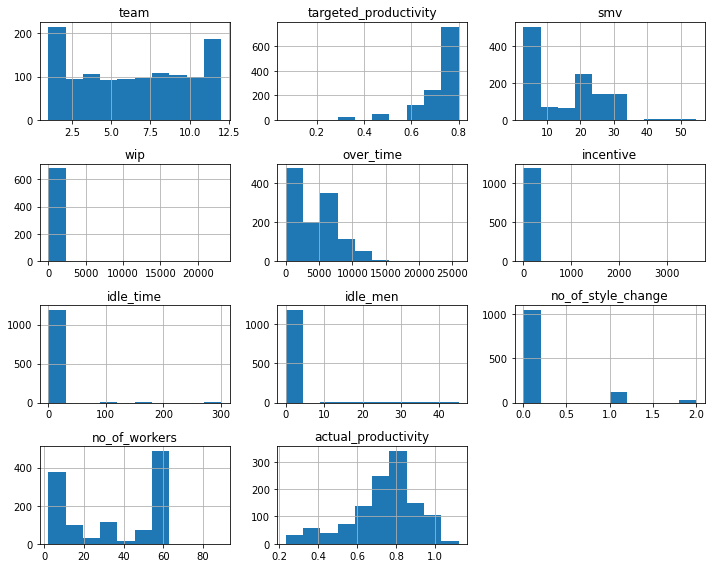

Data visualization - Correlation heatmap


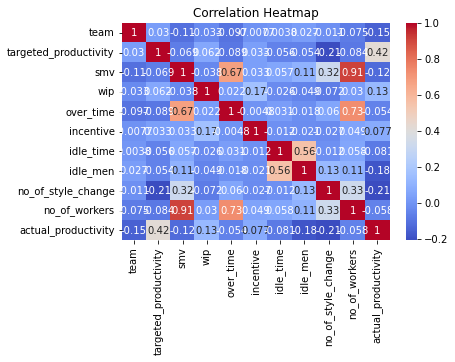

Assess skewness of the data
team                      0.009848
targeted_productivity    -2.144150
smv                       0.405937
wip                       9.741786
over_time                 0.673287
incentive                15.790746
idle_time                20.545425
idle_men                  9.855079
no_of_style_change        2.942506
no_of_workers            -0.111740
actual_productivity      -0.807492
dtype: float64


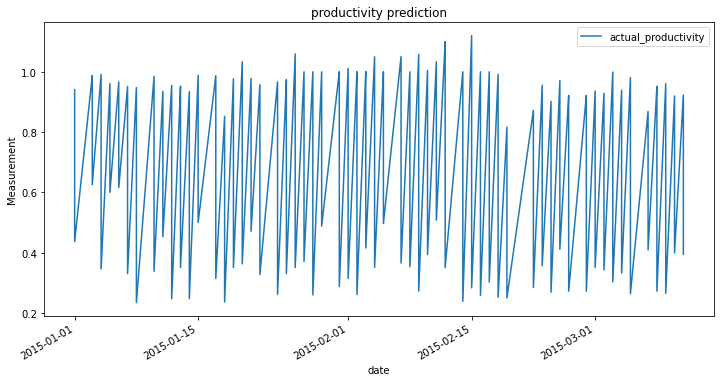

In [3]:
df = pd.read_csv('garments_worker_productivity.csv')

# Display the first few rows of the dataset
print("Display the first few rows of the dataset")
print(df.head())

# Summary statistics of the dataset
print("Summary statistics of the dataset")
print(df.describe())

# Check for missing values
print("Check for missing values")
print(df.isnull().sum())

# Data visualization - Histogram of each feature
print("Data visualization - Histogram of each feature")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Data visualization - Correlation heatmap
print("Data visualization - Correlation heatmap")
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Assess skewness of the data
print("Assess skewness of the data")
skewness = df.skew()
print(skewness)

# Identify potential biases
# You can perform further analysis based on your specific research objectives and the features in the dataset.
# For example, you can compare the distribution of air quality measurements across different time periods, locations, or weather conditions.

# Time series analysis - Visualize the quality of change
df['date'] = pd.to_datetime(df["date"])
#df['Target (Total orders)'] = pd.to_numeric(df['Target (Total orders)'])
df.plot(x="date", y=["actual_productivity"], figsize=(12, 6))
plt.title("productivity prediction")
plt.ylabel("Measurement")
plt.show()


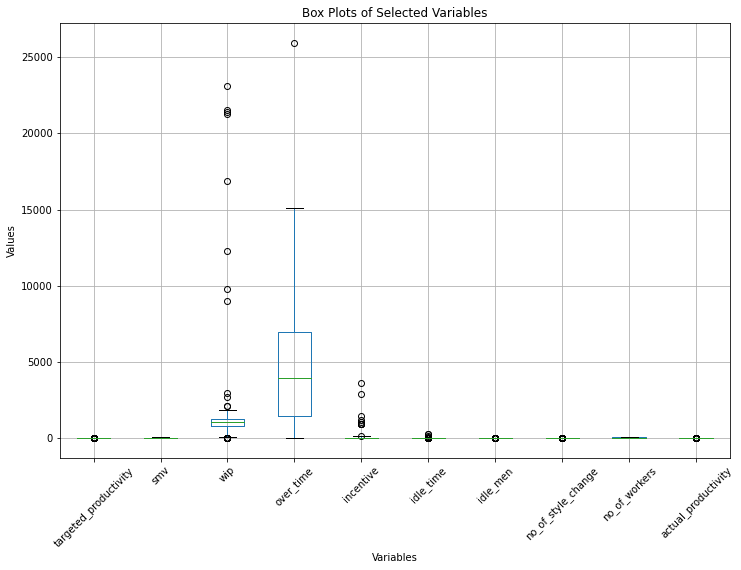

Outliers found in column: targeted_productivity
146     0.35
194     0.35
214     0.35
216     0.35
237     0.35
239     0.35
255     0.35
259     0.35
336     0.35
350     0.35
414     0.35
455     0.35
479     0.35
494     0.35
617     0.35
633     0.07
685     0.35
689     0.35
690     0.35
705     0.35
715     0.35
729     0.35
735     0.35
748     0.35
958     0.35
961     0.35
1040    0.40
1046    0.40
1086    0.35
1091    0.35
Name: targeted_productivity, dtype: float64
Number of outliers in column targeted_productivity: 30


Outliers found in column: smv
191    50.48
209    50.48
257    51.02
287    48.68
303    48.84
316    49.10
332    48.84
367    54.56
476    48.18
537    50.89
Name: smv, dtype: float64
Number of outliers in column smv: 10


Outliers found in column: wip
561    16882.0
563    21385.0
564    21266.0
565    21540.0
568    12261.0
569    23122.0
570     8992.0
572     9792.0
Name: wip, dtype: float64
Number of outliers in column wip: 8


Outliers found in colu

In [4]:
#IDENTIFY DATA OUTLIERS

# Select the columns that may contain outliers
columns_of_interest = ["targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time",
                       "idle_men", "no_of_style_change", "no_of_workers", "actual_productivity"]

# Create box plots for each column to visualize outliers
plt.figure(figsize=(12, 8))
df[columns_of_interest].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots of Selected Variables")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

# Define the threshold for identifying outliers (you can adjust this based on your specific requirements)
outlier_threshold = 3  # Adjust this value as needed

# Iterate over each column and identify the outliers
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    
    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]
    
    if outliers.empty:
        print(f"No outliers found in column: {column}")
    else:
        print(f"Outliers found in column: {column}")
        print(outliers)
        
    # Count the number of outliers in the column
    num_outliers = len(outliers)
    print(f"Number of outliers in column {column}: {num_outliers}")
    print("\n")

In [5]:
# Select the columns of interest (replace the column names as per your dataset)
columns_of_interest = ["targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time",
                       "idle_men", "no_of_style_change", "no_of_workers", "actual_productivity"]
# Create a new DataFrame to store the relevancy scores
relevancy_scores = pd.DataFrame(columns=["Column", "RelevancyScore"])

# Iterate over each column and calculate the relevancy score
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]

    # Calculate the relevancy score for the column
    relevancy_score = len(df[column]) - df[column].isnull().sum() - len(outliers)

    # Append the column name and relevancy score to the relevancy_scores DataFrame
    relevancy_scores = relevancy_scores.append({"Column": column, "RelevancyScore": relevancy_score}, ignore_index=True)

# Print the relevancy scores for each column
print("Relevancy Scores:")
print(relevancy_scores)

Relevancy Scores:
                  Column RelevancyScore
0  targeted_productivity           1167
1                    smv           1187
2                    wip            683
3              over_time           1192
4              incentive           1187
5              idle_time           1193
6               idle_men           1182
7     no_of_style_change           1164
8          no_of_workers           1197
9    actual_productivity           1197


In [6]:
# Create a new DataFrame to store the consistency scores
consistency_scores = pd.DataFrame(columns=["Column", "ConsistencyScore"])

# Iterate over each column and calculate the consistency score
for column in columns_of_interest:
    # Calculate the coefficient of variation (CV)
    cv = df[column].std() / df[column].mean()
    
    # Calculate the consistency score for the column (higher consistency -> lower CV)
    consistency_score = 1 - cv
    
    # Append the column name and consistency score to the consistency_scores DataFrame
    consistency_scores = consistency_scores.append({"Column": column, "ConsistencyScore": consistency_score}, ignore_index=True)

# Print the consistency scores for each column
print("Consistency Scores:")
print(consistency_scores)

Consistency Scores:
                  Column  ConsistencyScore
0  targeted_productivity          0.865835
1                    smv          0.273463
2                    wip         -0.543475
3              over_time          0.266808
4              incentive         -3.192108
5              idle_time        -16.406840
6               idle_men         -7.852891
7     no_of_style_change         -1.845188
8          no_of_workers          0.358631
9    actual_productivity          0.762631


In [7]:
# Select the columns of interest
columns_of_interest = ["targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time",
                       "idle_men", "no_of_style_change", "no_of_workers", "actual_productivity"]

# Calculate the KPIs for data bias and skewed data
kpi_results = {}

for column in columns_of_interest:
    kpi_results[column] = {
        "Mean": df[column].mean(),
        "Median": df[column].median(),
        "Mode": df[column].mode()[0],
        "Skewness": df[column].skew(),
        "Range": df[column].max() - df[column].min(),
        "IQR": df[column].quantile(0.75) - df[column].quantile(0.25),
        "Variance": df[column].var(),
        "Standard Deviation": df[column].std()
    }

# Create a DataFrame from the KPI results
kpi_df = pd.DataFrame(kpi_results)

# Print the KPI results
print("KPI Results:")
print(kpi_df)

KPI Results:
                    targeted_productivity         smv           wip  \
Mean                             0.729632   15.062172  1.190466e+03   
Median                           0.750000   15.260000  1.039000e+03   
Mode                             0.800000    3.940000  1.039000e+03   
Skewness                        -2.144150    0.405937  9.741786e+00   
Range                            0.730000   51.660000  2.311500e+04   
IQR                              0.100000   20.320000  4.780000e+02   
Variance                         0.009583  119.754046  3.376241e+06   
Standard Deviation               0.097891   10.943219  1.837455e+03   

                       over_time     incentive   idle_time   idle_men  \
Mean                4.567460e+03     38.210526    0.730159   0.369256   
Median              3.960000e+03      0.000000    0.000000   0.000000   
Mode                9.600000e+02      0.000000    0.000000   0.000000   
Skewness            6.732873e-01     15.790746   20.545

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded and preprocessed your time series data into the "df" DataFrame

# List of columns of interest for anomaly detection
columns_of_interest = ["targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time",
                       "idle_men", "no_of_style_change", "no_of_workers", "actual_productivity"]

# Prompt the user to choose a column
print("Available columns:")
for i, col in enumerate(columns_of_interest):
    print(f"{i+1}. {col}")
choice = input("Choose a column number to detect anomalies: ")

try:
    # Convert the choice to integer and get the selected column name
    column_index = int(choice) - 1
    selected_column = columns_of_interest[column_index]
    
    # Create the ARIMA model
    model = ARIMA(df[selected_column], order=(1, 1, 1))
    
    # Fit the model
    model_fit = model.fit()
    
    # Get the predicted values and residuals
    predictions = model_fit.predict()
    residuals = df[selected_column] - predictions
    
    # Calculate the mean and standard deviation of the residuals
    mean = np.mean(residuals)
    std = np.std(residuals)
    
    # Set a threshold for anomaly detection (e.g., 3 standard deviations from the mean)
    threshold = 3 * std
    
    # Detect anomalies by comparing the absolute residuals to the threshold
    anomalies = np.abs(residuals) > threshold
    
    # Print the indices of the detected anomalies
    print("Detected anomalies:")
    print(df.index[anomalies])
    
except (ValueError, IndexError):
    print("Invalid choice. Please choose a valid column number.")


Available columns:
1. targeted_productivity
2. smv
3. wip
4. over_time
5. incentive
6. idle_time
7. idle_men
8. no_of_style_change
9. no_of_workers
10. actual_productivity
Detected anomalies:
Int64Index([36, 146], dtype='int64')


Available columns:
1. targeted_productivity
2. smv
3. wip
4. over_time
5. incentive
6. idle_time
7. idle_men
8. no_of_style_change
9. no_of_workers
10. actual_productivity


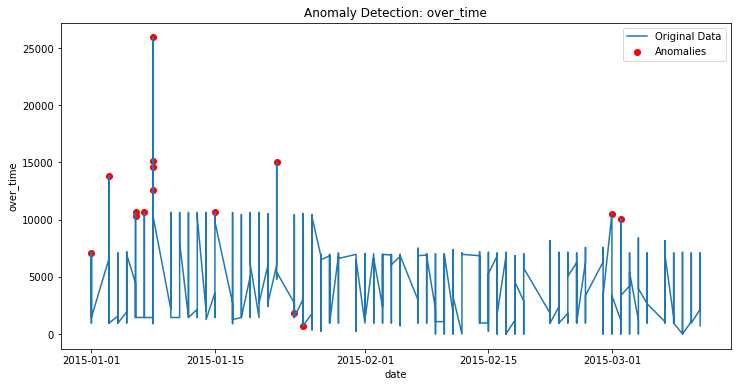

Detected anomalies:
      over_time
0             1
36            1
88            1
92            1
106           1
127           1
138           1
139           1
146           1
264           1
383           1
398           1
435           1
985           1
1006          1
Detected skewed data points:
Empty DataFrame
Columns: [over_time, Skewed Data]
Index: []


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded and preprocessed your time series data into the "df" DataFrame

# List of columns of interest for anomaly detection
columns_of_interest = ["targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time",
                       "idle_men", "no_of_style_change", "no_of_workers", "actual_productivity"]

# Prompt the user to choose columns
print("Available columns:")
for i, col in enumerate(columns_of_interest):
    print(f"{i+1}. {col}")
choice = input("Choose column numbers (comma-separated) to detect anomalies: ")

try:
    # Convert the choices to a list of column indices
    column_indices = [int(x.strip()) - 1 for x in choice.split(",")]

    # Create an empty DataFrame to store the anomalies
    anomalies_df = pd.DataFrame(index=df.index)

    for index in column_indices:
        if index < 0 or index >= len(columns_of_interest):
            continue

        # Get the selected column name
        selected_column = columns_of_interest[index]

        # Create the ARIMA model
        model = ARIMA(df[selected_column], order=(1, 1, 1))

        # Fit the model
        model_fit = model.fit()

        # Get the predicted values and residuals
        predictions = model_fit.predict()
        residuals = df[selected_column] - predictions

        # Calculate the mean and standard deviation of the residuals
        mean = np.mean(residuals)
        std = np.std(residuals)

        # Set a threshold for anomaly detection (e.g., 3 standard deviations from the mean)
        threshold = 2 * std

        # Detect anomalies by comparing the absolute residuals to the threshold
        anomalies = np.abs(residuals) > threshold

        # Add the anomalies to the anomalies DataFrame
        anomalies_df[selected_column] = anomalies.astype(int)

        # Plot the time series data with detected anomalies
        plt.figure(figsize=(12, 6))
        plt.plot(df["date"], df[selected_column], label="Original Data")
        plt.scatter(df["date"][anomalies], df[selected_column][anomalies], color='red', label="Anomalies")
        plt.xlabel("date")
        plt.ylabel(selected_column)
        plt.title(f"Anomaly Detection: {selected_column}")
        plt.legend()
        plt.show()

    # Print the detected anomalies
    print("Detected anomalies:")
    print(anomalies_df.loc[anomalies_df.any(axis=1)])

except (ValueError, IndexError):
    print("Invalid choices. Please choose valid column numbers.")


# Calculate the skewness of the residuals
residual_skewness = residuals.skew()

# Set a threshold for skewness
skewness_threshold = 1.0  # Adjust this threshold based on your data and requirements

# Detect skewed data points by comparing the absolute skewness to the threshold
skewed_data_points = np.abs(residual_skewness) > skewness_threshold

# Add the detected skewed data points to the anomalies DataFrame
anomalies_df["Skewed Data"] = skewed_data_points.astype(int)

# Print the detected skewed data points
print("Detected skewed data points:")
print(anomalies_df.loc[anomalies_df["Skewed Data"] == 1])

